In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1
Dane są dwa sygnały o okresie podstawowym N=4: s1 = {2, 1, 3, 0} i s2 = {0, 1, 3, 0}


In [2]:
period = 4
s1 = [2, 1, 3, 0]
s2 = [0, 1, 3, 0]

#### a) Dla każdego z sygnału:
- wyznaczyć i wykreślić widmo amplitudowe i fazowe

In [3]:
def calc_spectrum(signal):
    return np.fft.fft(signal) / len(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))

def calc_phase_spectrum(signal):
    return np.angle(calc_spectrum(signal))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


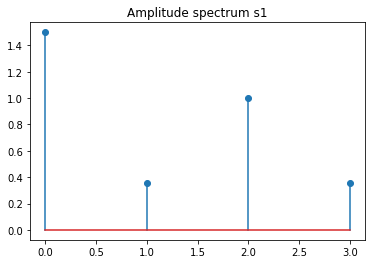

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


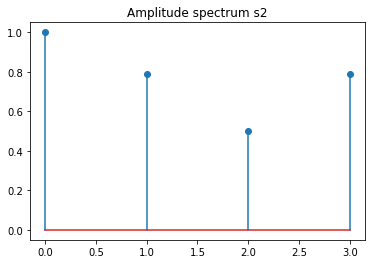

In [5]:
plt.stem(calc_amplitude_spectrum(s1))
plt.title("Amplitude spectrum s1")
plt.show()

plt.stem(calc_amplitude_spectrum(s2))
plt.title("Amplitude spectrum s2")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


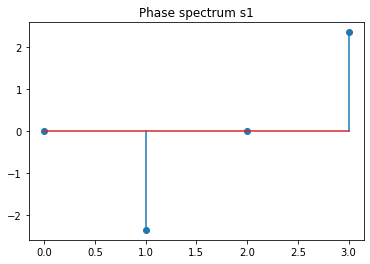

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


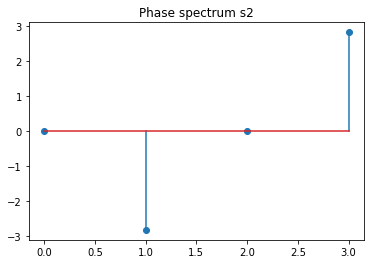

In [6]:
plt.stem(calc_phase_spectrum(s1))
plt.title("Phase spectrum s1")
plt.show()

plt.stem(calc_phase_spectrum(s2))
plt.title("Phase spectrum s2")
plt.show()

- obliczyć moc sygnału

In [7]:
def calc_power(signal):
    return sum([a**2 for a in signal]) / len(signal)

In [8]:
print("Power_s1 = ", calc_power(s1))
print("Power_s2 = ", calc_power(s2))

Power_s1 =  3.5
Power_s2 =  2.5


- sprawdzić słuszność twierdzenia Parsevala

In [9]:
def calc_parseval(signal):
    return sum([np.abs(a)**2 for a in calc_spectrum(signal)])

def check_parseval_theorem(signal):
    return calc_power(signal) == calc_parseval(signal)

In [10]:
print("Parseval_power_s1 = ", calc_parseval(s1))
print("Parseval_power_s2 = ", calc_parseval(s2))
print(f"Twierdzenie Parsevala dla s1 {'jest' if check_parseval_theorem(s1) else 'nie jest'} prawdziwe")
print(f"Twierdzenie Parsevala dla s2 {'jest' if check_parseval_theorem(s2) else 'nie jest'} prawdziwe")

Parseval_power_s1 =  3.5
Parseval_power_s2 =  2.5
Twierdzenie Parsevala dla s1 jest prawdziwe
Twierdzenie Parsevala dla s2 jest prawdziwe


#### b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów s1 i s2:
- wyznaczyć ręcznie splot kołowy sygnałów s1 i s2
- wyznaczyć splot za pomocą dyskretnej transformacji Fouriera

In [11]:
def calc_circular_convolution(signal1, signal2):
    convolution = []
    for i1, _ in enumerate(signal1):
        convolution.append(sum([signal1[i2]*signal2[i1-i2] for i2, _ in enumerate(signal1)]))
    return convolution

def calc_circular_convolution_fft(signal1, signal2):
    return np.fft.ifft(np.fft.fft(signal1) * np.fft.fft(signal2))

In [12]:
convolution = calc_circular_convolution(s1, s2)
convolution_fft = calc_circular_convolution_fft(s1, s2)
print("Splot wyznaczony ręcznie: ", convolution)
print("Splot wyznaczony za pomocą DTF: ", convolution_fft)

Splot wyznaczony ręcznie:  [9, 2, 7, 6]
Splot wyznaczony za pomocą DTF:  [9.+0.j 2.+0.j 7.+0.j 6.+0.j]


Wyniki są takie same, więc twierdzenie o dyskretnej transformacji Fouriera jest prawdziwe